## **Crypto price forecast using Facebook Prophet Library**

In [ ]:
!pip install -U yfinance
!pip install -U plotly
!pip install -U kaleido

     |████████████████████████████████| 6.3 MB 15.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 25.3 MB 2.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 79.9 MB 122 kB/s 


In [ ]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt, matplotlib.ticker as ticker
%matplotlib inline

import yfinance as yf
from fbprophet import Prophet
import os, time, datetime
import plotly.express as px, plotly.graph_objs as go

from google.colab import files
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

In [ ]:
def get_bollinger_band(prices, rate=20):
         sma = prices.rolling(rate).mean()
         std = prices.rolling(rate).std()
         bollinger_up = sma + std * 2 
         bollinger_down = sma - std * 2
         return sma, bollinger_up, bollinger_down

In [ ]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, timeout=None, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' o

**Change the Important parameters below**

In [ ]:
coin = 'BTC'
period = 'max'
interval = '1d'

In [ ]:
data = yf.download(tickers=f'{coin}-USD',period = period, interval = interval)
print (f'{len(data)} rows of data')
data.head()

[*********************100%***********************]  1 of 1 completed
2641 rows of data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Text(0.5, 1.0, 'Market price for BTC-USD over max')

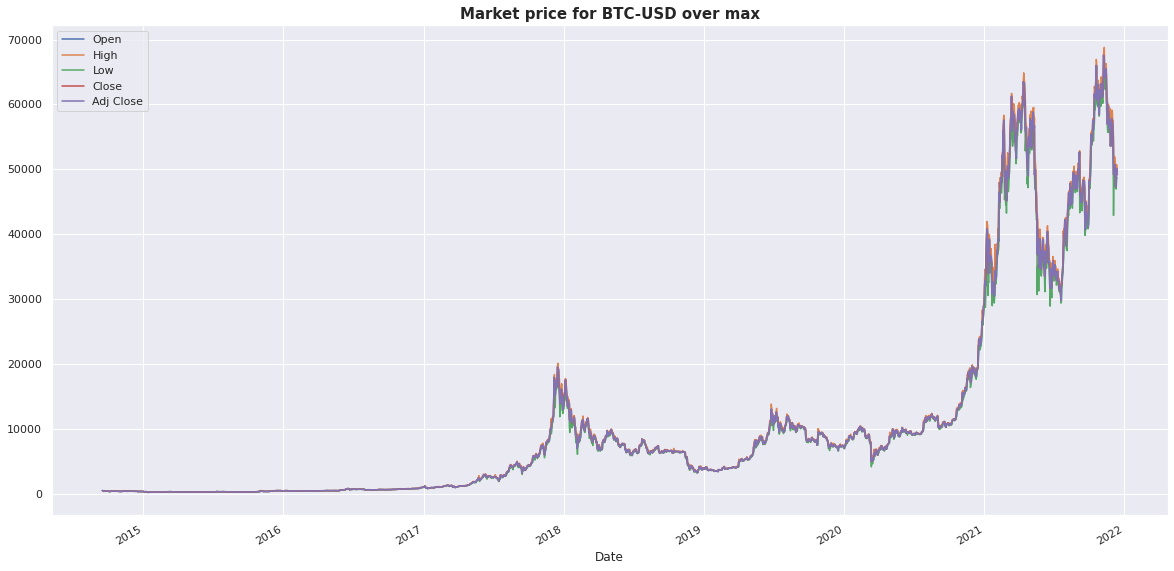

In [ ]:
sns.set_theme()
data.drop('Volume', axis=1).plot.line(figsize = (20,10))
plt.title(f'Market price for {coin}-USD over {period}', weight='bold', fontsize ='15')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,
                                 open=data['Open'],
                                 high=data['High'],
                                 low=data['Low'],
                                 close=data['Close'], 
                                 name = 'Market data'))


fig.update_layout(title=f'Market price for {coin}-USD over {period}')
fig.update_xaxes(title=f'Datetime', rangeslider_visible =True)
fig.update_yaxes(title='USD ($)')

fig.write_image(f'Market_price_for_{coin}-USD.jpeg', engine='kaleido')
fig.show()

In [ ]:
try: use_df = pd.DataFrame(
    {'ds' : data.index.tz_convert(None),
    'y' : data.Close})

except: use_df = pd.DataFrame(
    {'ds' : data.index,
    'y' : data.Close})



use_df.head(2)

,ds,y
Date,,
2014-09-17,2014-09-17,457.334015
2014-09-18,2014-09-18,424.440002


In [ ]:
tick = time.time()

model = Prophet() 
model.fit(use_df)

print('\n\nTime taken is {} seconds'.format(round(time.time()-tick, 2)), end = '\n\n')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Time taken is 3.43 seconds



In [ ]:
#predict for the next 3 months

future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,136.077492,-8024.020350,3481.354951,136.077492,136.077492,-2318.105583,-2318.105583,-2318.105583,11.796826,11.796826,11.796826,-2329.902408,-2329.902408,-2329.902408,0.0,0.0,0.0,-2182.028091
1,2014-09-18,136.507153,-7859.616774,3189.080729,136.507153,136.507153,-2419.167178,-2419.167178,-2419.167178,-35.232799,-35.232799,-35.232799,-2383.934379,-2383.934379,-2383.934379,0.0,0.0,0.0,-2282.660025
2,2014-09-19,136.936815,-7800.910556,3479.905392,136.936815,136.936815,-2404.007250,-2404.007250,-2404.007250,25.929806,25.929806,25.929806,-2429.937056,-2429.937056,-2429.937056,0.0,0.0,0.0,-2267.070435
3,2014-09-20,137.366476,-8070.553444,2699.519011,137.366476,137.366476,-2463.261580,-2463.261580,-2463.261580,3.982452,3.982452,3.982452,-2467.244032,-2467.244032,-2467.244032,0.0,0.0,0.0,-2325.895104
4,2014-09-21,137.796138,-7749.056878,3273.903442,137.796138,137.796138,-2510.514071,-2510.514071,-2510.514071,-15.218022,-15.218022,-15.218022,-2495.296049,-2495.296049,-2495.296049,0.0,0.0,0.0,-2372.717933


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,136.077492,-8024.020350,3481.354951,136.077492,136.077492,-2318.105583,-2318.105583,-2318.105583,11.796826,11.796826,11.796826,-2329.902408,-2329.902408,-2329.902408,0.0,0.0,0.0,-2182.028091
1,2014-09-18,136.507153,-7859.616774,3189.080729,136.507153,136.507153,-2419.167178,-2419.167178,-2419.167178,-35.232799,-35.232799,-35.232799,-2383.934379,-2383.934379,-2383.934379,0.0,0.0,0.0,-2282.660025
2,2014-09-19,136.936815,-7800.910556,3479.905392,136.936815,136.936815,-2404.007250,-2404.007250,-2404.007250,25.929806,25.929806,25.929806,-2429.937056,-2429.937056,-2429.937056,0.0,0.0,0.0,-2267.070435
3,2014-09-20,137.366476,-8070.553444,2699.519011,137.366476,137.366476,-2463.261580,-2463.261580,-2463.261580,3.982452,3.982452,3.982452,-2467.244032,-2467.244032,-2467.244032,0.0,0.0,0.0,-2325.895104
4,2014-09-21,137.796138,-7749.056878,3273.903442,137.796138,137.796138,-2510.514071,-2510.514071,-2510.514071,-15.218022,-15.218022,-15.218022,-2495.296049,-2495.296049,-2495.296049,0.0,0.0,0.0,-2372.717933


In [ ]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries of the predicted value

metrics = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']] 
metrics.head(5)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2014-09-17,-2182.028091,-8024.020350,3481.354951,136.077492,136.077492,136.077492
1,2014-09-18,-2282.660025,-7859.616774,3189.080729,136.507153,136.507153,136.507153
2,2014-09-19,-2267.070435,-7800.910556,3479.905392,136.936815,136.936815,136.936815
3,2014-09-20,-2325.895104,-8070.553444,2699.519011,137.366476,137.366476,137.366476
4,2014-09-21,-2372.717933,-7749.056878,3273.903442,137.796138,137.796138,137.796138


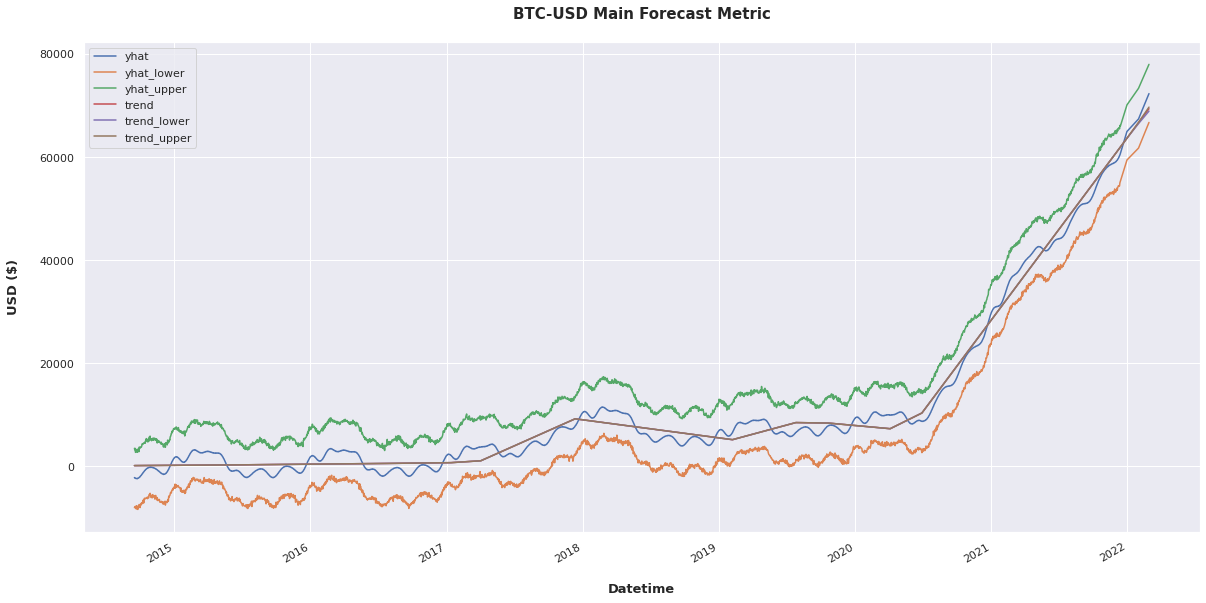

In [ ]:
metrics.set_index('ds').plot.line(figsize = (20,10))
if len(metrics)>5000: plt.yscale('log')
plt.title(f'{coin}-USD Main Forecast Metric\n', weight = 'bold', fontsize = '15')
plt.ylabel('USD ($)\n', weight = 'bold', fontsize = '13')
plt.xlabel('\nDatetime', weight = 'bold', fontsize = '13')
plt.savefig(f'{coin}-USD_Main_Forecast_Metric.jpeg')
plt.show()

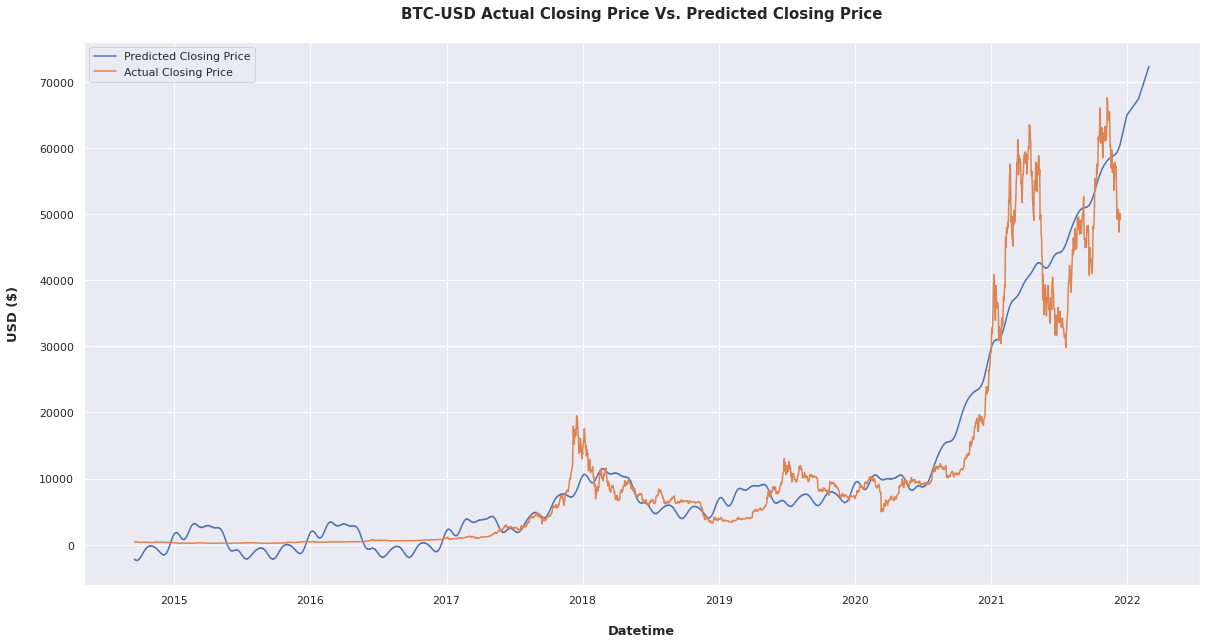

In [ ]:
plt.figure(figsize=(20,10))
plt.title(f'{coin}-USD Actual Closing Price Vs. Predicted Closing Price\n', weight = 'bold', fontsize = '15')
ax = sns.lineplot(x = metrics['ds'], y = metrics['yhat'])
ax.plot(use_df['ds'], use_df['y'])

plt.ylabel('USD ($)\n', weight = 'bold', fontsize = '13')
plt.xlabel('\nDatetime', weight = 'bold', fontsize = '13')

plt.legend(['Predicted Closing Price', 'Actual Closing Price'])
plt.savefig(f"{coin.upper()}-USD_actual_vs_forecast-plot.jpeg")

plt.show()

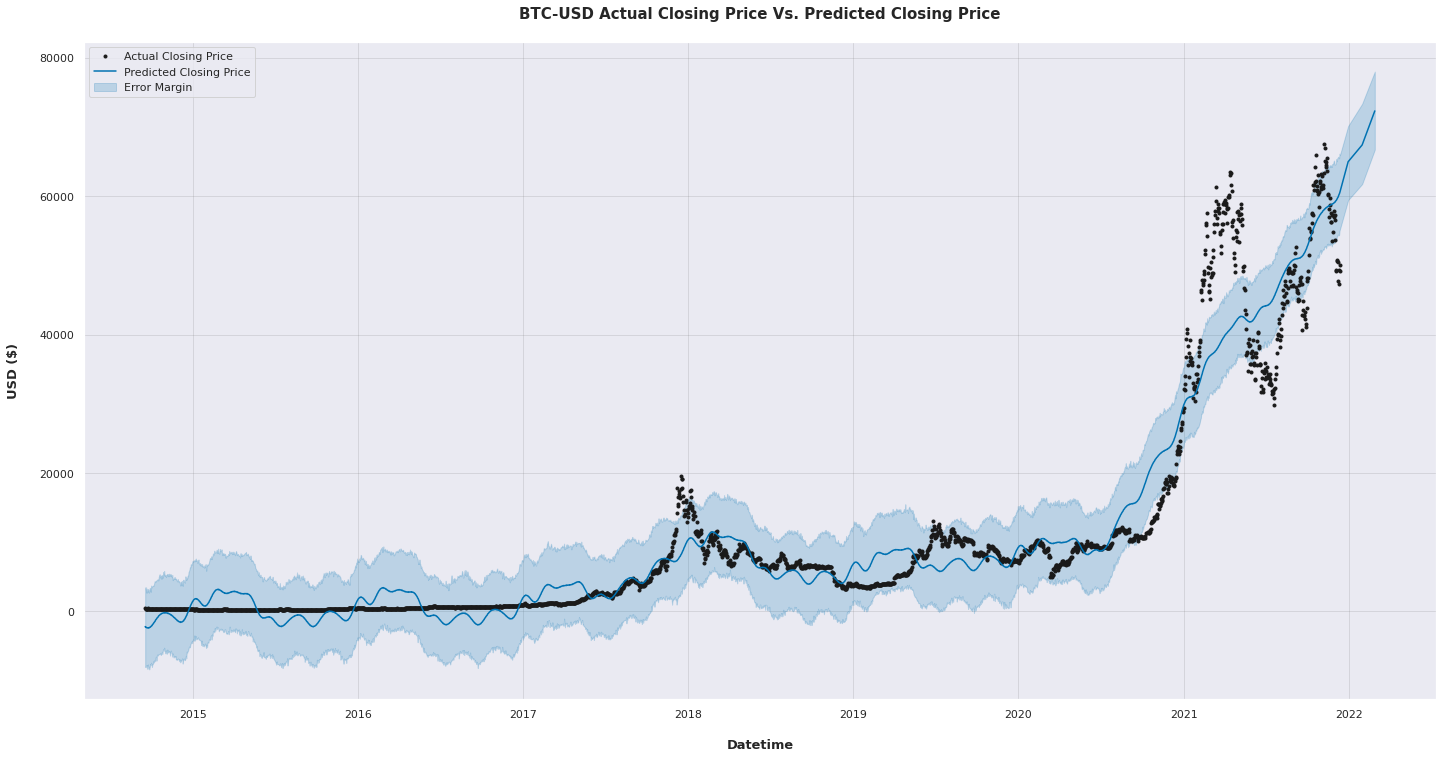

In [ ]:

model.plot(forecast, figsize=(20,10))
if len(forecast)>5000: plt.yscale('log')
plt.title(f'{coin.upper()}-USD Actual Closing Price Vs. Predicted Closing Price\n', weight = 'bold', fontsize = '15')

plt.ylabel('USD ($)\n', weight = 'bold', fontsize = '13')
plt.xlabel('\nDatetime', weight = 'bold', fontsize = '13')

plt.legend(['Actual Closing Price', 'Predicted Closing Price', 'Error Margin'], loc=2)
plt.savefig(f"{coin.upper()}-USD_forecast_direct-plot.jpeg")
plt.show()

In [ ]:

metric = metrics.copy()

fig = px.line(data_frame=metric, x='ds', y='yhat', title = f'Chart of Predicted Closing Prices for {coin}-USD')
fig.add_scatter(x=metric['ds'], y=metric['trend'], mode='lines', line={'color':'darkblue','width':1.5}, name = 'Trend')
fig.add_scatter(x=use_df['ds'], y=use_df['y'], mode='lines', line = {'color':'darkmagenta','width':1.5}, name = 'Close')

fig.add_trace(go.Candlestick(x=data.index,
                                 open=data['Open'],
                                 high=data['High'],
                                 low=data['Low'],
                                 close=data['Close'], 
                                 name = 'Market data'))


fig.update_xaxes(title=f'Datetime', rangeslider_visible =True)
fig.update_yaxes(title='USD ($)')

In [ ]:
fig.write_image(f'{coin.upper()}-USD_forecast_plot.jpeg', engine='kaleido')

In [ ]:
for doc in os.listdir('../content/')[1:-1]: files.download(doc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
signal = data[['Close']].rename(columns = {'Close' : 'y'})
signal['ds'] = data.index
signal_idx = int(len(signal) * 0.95)


train = signal.iloc[:signal_idx]
test = signal.iloc[signal_idx:]

#train_idx = int(len(train) * 0.9)
#X_train, y_train = train.iloc[:train_idx], train

In [ ]:
real_model = Prophet()
real_model.fit(train)
real_model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred = real_model.predict(test[['ds']])

In [ ]:
pred.set_index('ds', inplace = True)

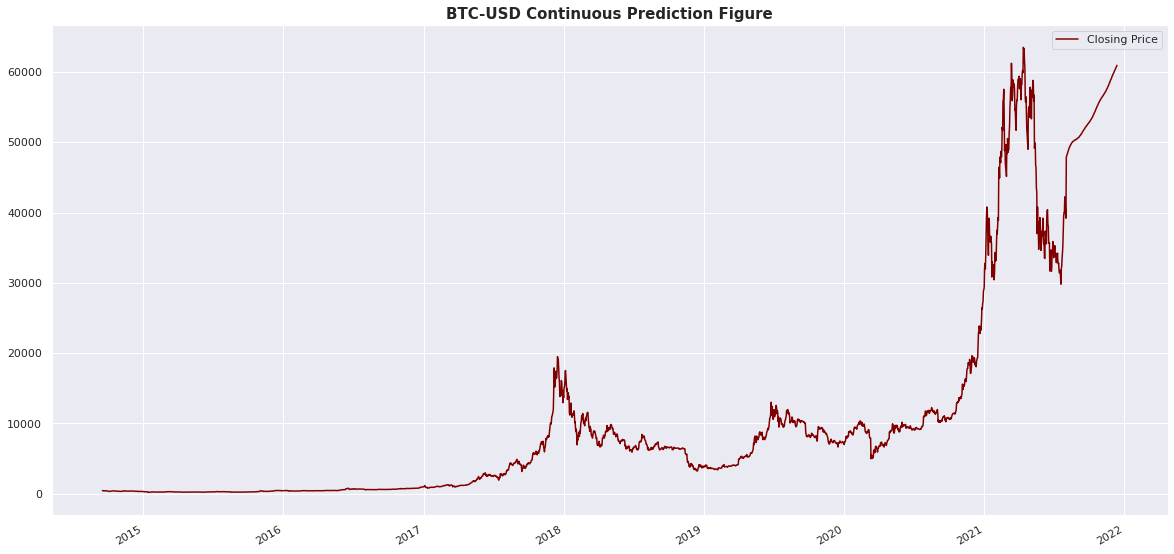

In [ ]:
plt.title(f'{coin}-USD Continuous Prediction Figure', fontsize = 15, weight = 'bold')
cont = pd.concat([train['y'], pred['yhat']], axis = 0)
#realcont = pd.
cont.plot.line(figsize = (20,10),
               color = ['maroon'])
plt.legend(['Closing Price'])
plt.plot(#datetime.datetime(2021, 10, 02), 70000, 'g--')
    train.tail(1).index.values[0], train.tail(1)['y'].values[0])

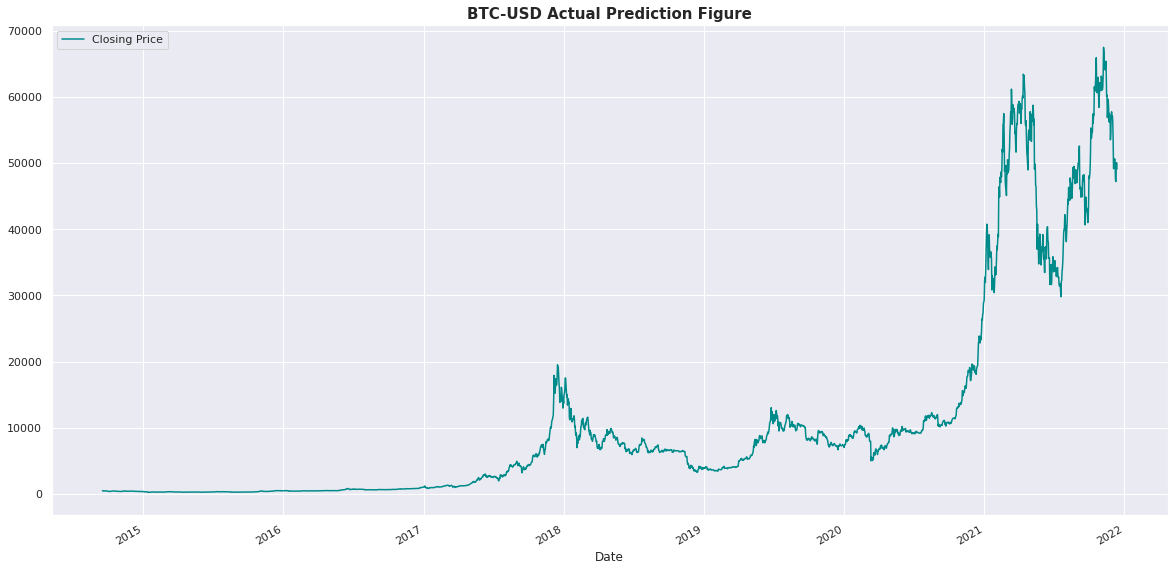

In [ ]:
signal.drop('ds', axis = 1).plot.line(figsize = (20,10), color = 'darkcyan')
plt.title(f'{coin}-USD Actual Prediction Figure', fontsize = 15, weight = 'bold')
plt.legend(['Closing Price'])

### **LSTM Prediction**

In [ ]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2509

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:5]

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       [0.00342492],
       [0.0032753 ]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

(2449, 60, 1)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape, y_test.shape

((132, 60, 1), (132, 1))

In [ ]:
# Build the LSTM model
model = tf.keras.Sequential()
LSTM = tf.keras.layers.LSTM
Dense = tf.keras.layers.Dense

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = tf.keras.losses.MeanSquaredError())

print(model.summary())
# Train the model
history = model.fit(x_train, y_train, 
                    #validation_data = (x_test, y_test), 
                    batch_size=1, epochs=5)

Epoch 1/5
2449/2449 [==============================] - 52s 18ms/step - loss: 0.0511
Epoch 2/5
2449/2449 [==============================] - 45s 18ms/step - loss: 0.0105
Epoch 3/5
2449/2449 [==============================] - 45s 18ms/step - loss: 0.0014
Epoch 4/5
2449/2449 [==============================] - 46s 19ms/step - loss: 9.1391e-04
Epoch 5/5
2449/2449 [==============================] - 46s 19ms/step - loss: 0.0012


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2503.264221839878

In [ ]:
y_test.shape

(132, 1)

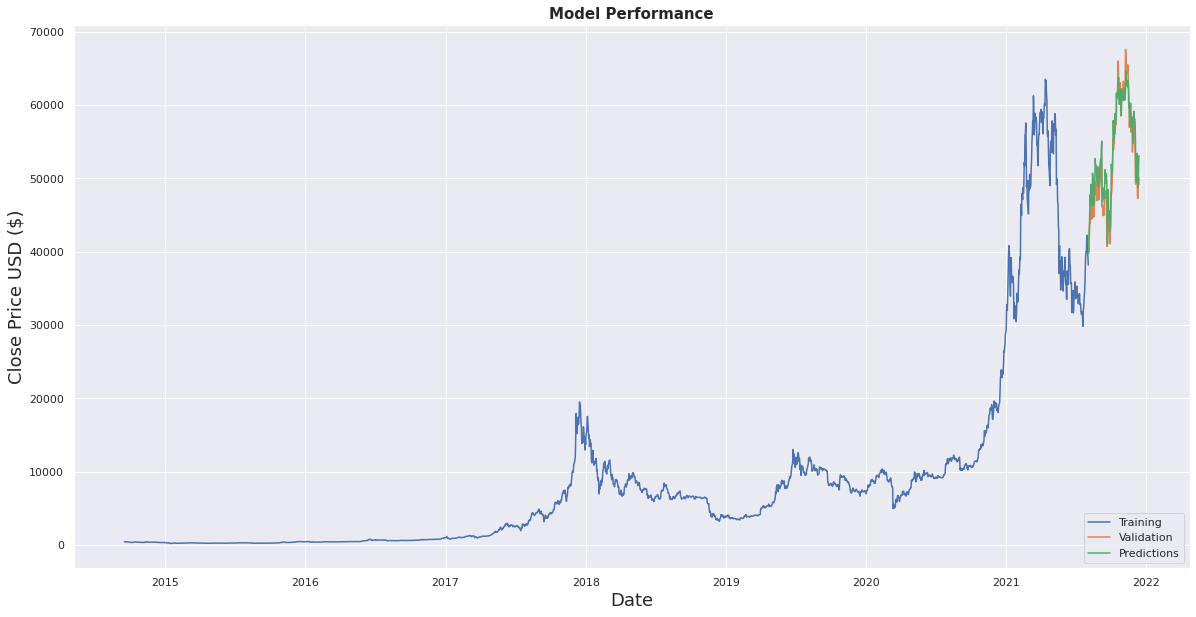

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model Performance', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
plt.show()

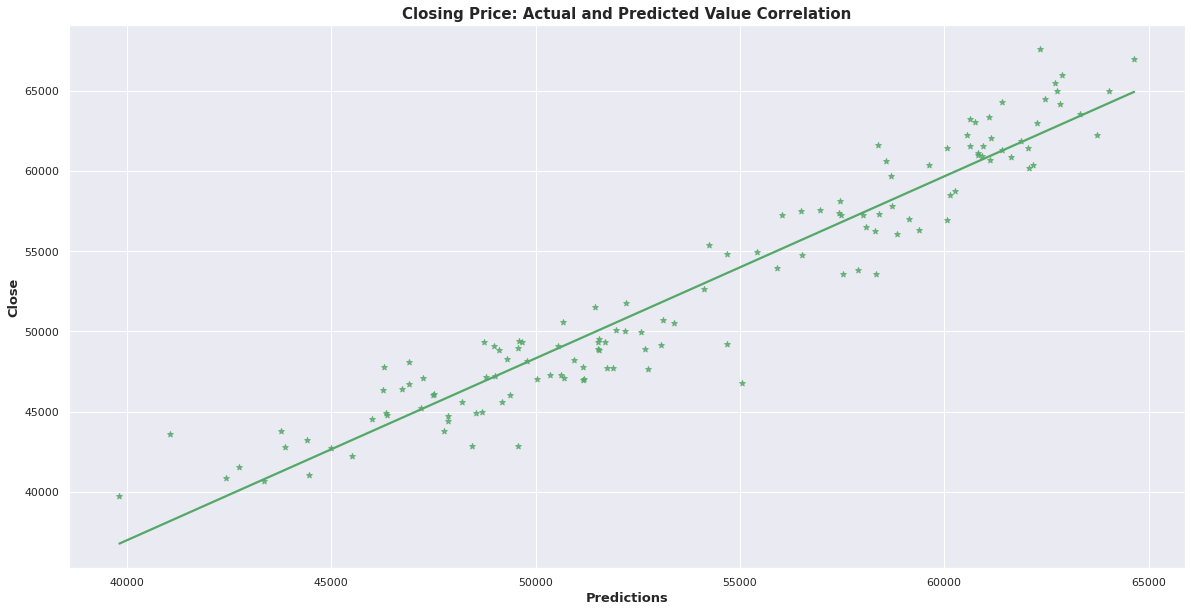

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Closing Price: Actual and Predicted Value Correlation', fontsize = 15, weight = 'bold')
plt.xlabel('Predictions', fontsize = 13, weight = 'bold')
plt.ylabel('Close', fontsize = 13, weight = 'bold')
sns.regplot(data = valid, x = 'Predictions', y = 'Close', color = 'g',
            ci = None,marker = '*')

### **Information on Model**

In [ ]:
model.trainable = False

In [ ]:
path = '/content/drive/MyDrive/Ml_Models/'
#model.save(path + 'crypto_pred_lstm.h5')

In [ ]:
#layers of the model
model.layers

In [ ]:
model.optimizer

In [ ]:
#help(model)

In [ ]:
#dir(model)